In [1]:
from astropy.io import fits
import glob
import shutil
import os
import numpy as np
from matplotlib import pyplot as plt
from utilities_az.visualization import zscale
%matplotlib inline

In [2]:
flist_r = glob.glob('r*.fits')
flist_b = glob.glob('b*.fits')

In [3]:
for ifile in flist_b:
    ofile = fits.open(ifile)
    hdr = ofile[0].header
    print(ifile, hdr['object'], hdr['ttime'], len(ofile))
for ifile in flist_r:
    ofile = fits.open(ifile)
    hdr = ofile[0].header
    print(ifile, hdr['object'], hdr['ttime'], len(ofile))

b171118_0014.fits HgNeArCdZnKrXe arc long_1.0 3 5
r171118_0027.fits HgNeArCdZnKrXe arc long_1.0 3 3
r171118_0014.fits HgNeArCdZnKrXe arc long_1.0 3 3


1
2


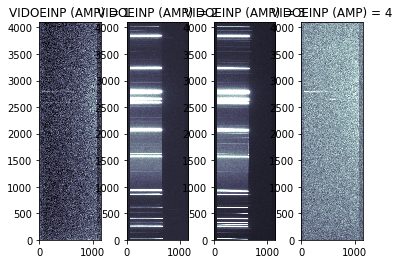

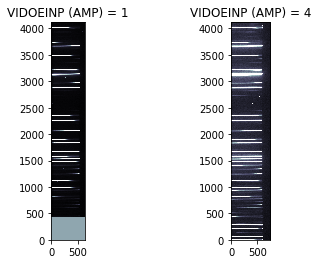

In [4]:
ofile_r = fits.open('r171118_0027.fits')
ofile_b = fits.open('b171118_0014.fits')
for i in range(len(ofile_r)):
    if i == 0:
        continue
    print(ofile_b[i].header['VIDEOINP'])
fig_b, ax_list_b = plt.subplots(1,len(ofile_b)-1)
for ax, ext in zip(ax_list_b, ofile_b[1:]):
    vmin, vmax = zscale(ext.data)
    ax.imshow(ext.data, vmin=vmin, vmax=vmax, cmap='bone')
    ax.set_title('VIDOEINP (AMP) = {}'.format(ext.header['VIDEOINP']))
fig_r, ax_list_r = plt.subplots(1,len(ofile_r)-1)
for ax, ext in zip(ax_list_r, ofile_r[1:]):
    vmin, vmax = zscale(ext.data)
    ax.imshow(ext.data, vmin=vmin, vmax=vmax, cmap='bone')
    ax.set_title('VIDOEINP (AMP) = {}'.format(ext.header['VIDEOINP']))

**Blue spectrum is on VIDEOINP=3 (ext 3), Red spectrum is on VIDEOINP=4 (ext 2)**

# Plot ARCS

# From Nov 11, 2017

In [5]:
blue_arc_filename = 'b171118_0014.fits'
red_arc_filename = 'r171118_0014.fits' #later arcs are funny
blue_ext = 3
red_ext = 2
blue_col = 221
red_col = 170

blue_ofile = fits.open(blue_arc_filename)
red_ofile = fits.open(red_arc_filename)

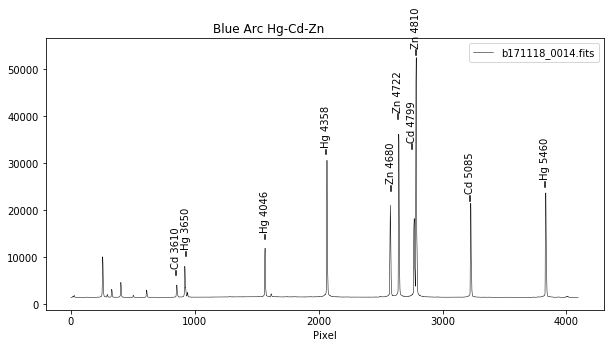

In [6]:
blue_lines = {'Hg 5460':(3824, 25000),
              'Cd 5085':(3218, 22000),
              'Zn 4810':(2783, 53000),
              'Cd 4799': (2750, 33000),
              'Zn 4722': (2640, 39400),
              'Zn 4680': (2580, 24090),
              'Hg 4358': (2060, 31832),
              'Hg 4046': (1570, 13768),
              'Hg 3650': (928, 10125),
              'Cd 3610': (852, 6062)}


fig_blue = plt.figure(figsize=(10,5))
ax_blue = fig_blue.add_subplot(1,1,1)
ax_blue.plot(blue_ofile[blue_ext].data[:, blue_col], lw=0.5, color='k', label=blue_arc_filename)
for key in blue_lines.keys():
    x,y = blue_lines[key]
    ax_blue.plot([x,x], [y, y+1000], color='k')
    ax_blue.text(x, y+1500, key, rotation='vertical', ha='center', va='bottom')
ax_blue.set_title('Blue Arc Hg-Cd-Zn', ha='right')
ax_blue.set_xlabel('Pixel')
ax_blue.legend()
plt.savefig('blue_arc_Hg-Cd-Zn.pdf')

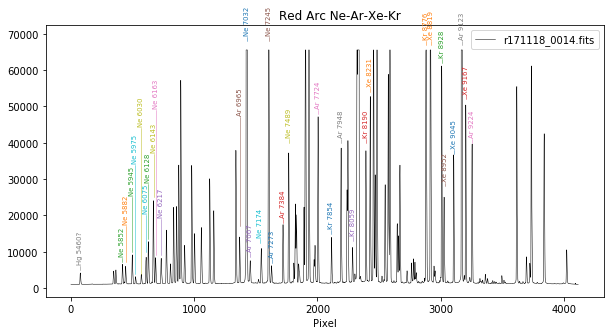

In [7]:
#ofile_red_dec = fits.open('../arcs_temp/r171219_0004.fits')
plt.close()
fig_red = plt.figure(figsize=(10,5))
ax_red = fig_red.add_subplot(1,1,1)
x = np.arange(len(red_ofile[red_ext].data[:, red_col]))
ax_red.plot(x, red_ofile[red_ext].data[:, red_col], label=red_arc_filename, lw=0.5, color='k')
#ax_red.plot(x,ofile_red_dec[red_ext].data[:, red_col],label='Dec', alpha=0.5)
plt.legend()
red_lines = {'Hg 5460?': (74, 5000, 1000),
             'Ne 5852': (418, 7200, 1000),
             'Ne 5882': (445, 7200, 10000),
             'Ne 5945': (498, 10000, 15000),
             'Ne 5975': (522, 4000, 30000),
             'Ne 6030': (571, 4000, 40000),
             'Ne 6075': (610, 10000, 10000),
             'Ne 6128': (629, 13600, 15000),
             'Ne 6143': (670, 25000, 12000),
             'Ne 6163': (690, 9000, 40000),
             'Ne 6217': (732, 9000, 10000),
             'Ar 6965': (1370, 17000, 30000),
             'Ne 7032': (1427, 68000, 1000),
             'Ar 7067': (1450, 8600, 1000), 
             'Ne 7174': (1535, 12500, 1000),
             'Ne 7245': (1610, 68000, 1000),
             'Ar 7273':(1630, 7000, 1000),
             'Ar 7384':(1721, 18000, 1000),
             'Ne 7489': (1765, 40000, 1000),
             'Ar 7724': (2008, 48000, 1000),
             'Kr 7854': (2112, 15000, 1000),
             'Ar 7948': (2194, 40000, 1000),
             'Kr 8059': (2285, 13000, 1000),
             'Kr 8190':(2393, 40000, 1000),
             'Xe 8231': (2425, 54000, 1000),
             'Kr 8776':(2881, 67000, 1000),
             'Xe 8819':(2917, 67000, 1000), 
             'Kr 8928': (3009, 62000, 1000),
             'Xe 8952': (3032, 28000, 1000),
             'Xe 9045': (3105, 37000, 1000), 
             'Ar 9123': (3175, 67000, 1000),
             'Xe 9167': (3205, 52000, 1000),
             'Ar 9224': (3250, 40000, 1000)}
            
for key in red_lines.keys():
    x,y, length = red_lines[key]
    l1,=ax_red.plot([x,x], [y, y+length], lw=0.5)
    ax_red.text(x, y+length+500, key, rotation='vertical', ha='center', va='bottom', fontsize='x-small', color=l1.get_color())

ax_red.set_title('        Red Arc Ne-Ar-Xe-Kr')
ax_red.set_xlabel('Pixel')
plt.savefig('red_arc_Ne-Ar-Xe-Kr.pdf')